In [20]:
# Requeriments: pip install matplotlib
# Requeriments: pip install Bio
# Requeriments: pip install rpy2
import matplotlib.pyplot as plt
from fasta_utils import read_list_from_file, size_to_list
from misc_ploting import get_boxplot_lines, get_parameters_for

### Selección de Dataset

In [21]:
dataset_name = "ls_orchid"
dataset_name = "usp_987"
#dataset_name = "usp_f"

### Cantidad de aminoácidos por entrada

In [22]:
show_title = False; show_text = True

sizes = read_list_from_file("data/sizes_" + dataset_name + ".txt")
sizes_ori = size_to_list("data/uniprot_sprot.fasta")

def plot_length_distribution() -> None:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    if show_title:
        fig.suptitle(dataset_name + " distribución de de entradas en función de su largo")
        ax1.set_title("con outliers")
        ax2.set_title("sin outliers")
    
    ax1.set_ylabel("cant. de aminoácidos")
    ax1.boxplot(sizes)
    ax2.boxplot(sizes, 0, '')

    for a in (ax1, ax2):
        a.grid(True, axis='y', linestyle='-', alpha=0.4)

    plt.show()

def plot_length_distribution_original_vs_working() -> None:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    if show_title:
        fig.suptitle("Cantidad de Aminoácidos por Entrada")
        ax1.set_title("con outliers")
        ax2.set_title("sin outliers")
    
    if show_text:
        ax1.set_xlabel("(a) con outliers")
        ax2.set_xlabel("(b) sin outliers")

    extra_lines = get_boxplot_lines(sizes)
    for l in extra_lines:
        ax2.axhline(l)

    ax1.set_ylabel("cant. de aminoácidos")
    ax1.boxplot([sizes_ori, sizes], tick_labels = ["usp", dataset_name])
    ax2.boxplot([sizes_ori, sizes], 0, '', tick_labels = ["usp", dataset_name])

    for a in (ax1, ax2):
        a.grid(True, axis='y', linestyle='-', alpha=0.4)

    plt.show()


Calculating sizes


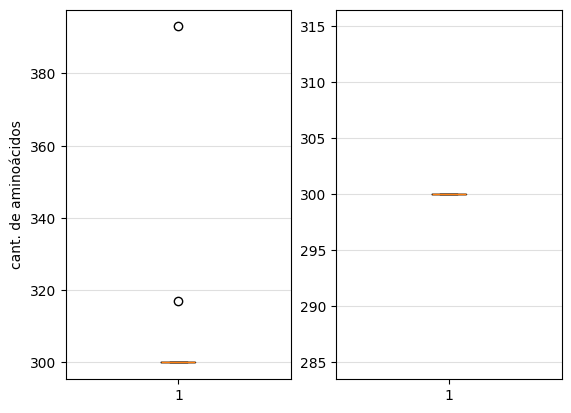

In [23]:
plot_length_distribution()

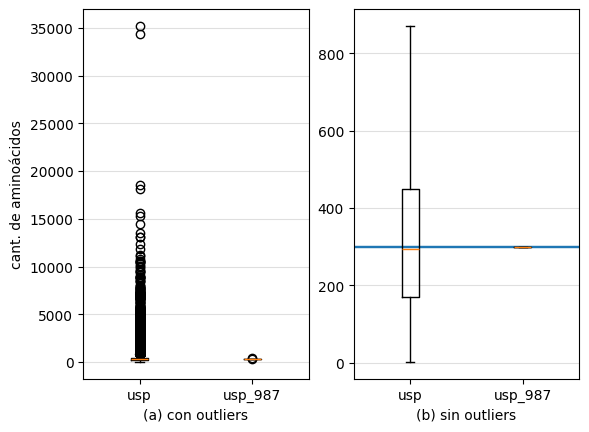

In [24]:
plot_length_distribution_original_vs_working()

### Selección de Complejidad y Carga de Datos:

In [25]:
#################################################
#Select complexity:
# 1: Icalc
# 2: Discrepancia
# 3: Discrepancia en Bloque 2
# 4: Kolmogorov / BDM algorithmic complexity estimation (bits)
# 5: Bennett / BDM logical depth estimation (steps)
# 6: Shannon entropy (bit(s))
# 7: Second order entropy (bit(s))
# 8: Compression length (using gzip) (bits)
selection = 3
#################################################

[complexity, orig_res, shuf_res, rand_res, _, sort_res, _] = get_parameters_for(selection, dataset_name)
sizes = read_list_from_file("data/sizes_" + dataset_name + ".txt")
shuf_res = [orig_res] + shuf_res
rand_res = [orig_res] + rand_res

labels = ["Original     ", "#01", "#02", "#03", "#04", "#05", "#06", "#07", "#08", "#09", "#10"]

### Ploteo de Boxplot para Datasets Random y Suffled

In [26]:
show_title = False; show_text = True

def plot_boxplot_shuffled_and_random(outiliers:bool = False) -> None:
    fig = plt.figure(figsize=(12, 4.5), layout='constrained')
    (ax1, ax2) = fig.subplots(1, 2)

    if show_title:
        fig.suptitle("Original " + dataset_name + " v.s. Random y Shuffled")
        ax1.set_title("Shuffled")
        ax2.set_title("Random")

    if show_text:
        ax1.set_xlabel("(a) Shuffled")
        ax2.set_xlabel("(b) Random")

    extra_lines = get_boxplot_lines(shuf_res[0])
    for l in extra_lines:
        ax1.axhline(l)
        ax2.axhline(l)

    ax1.set_ylabel("Complejidad en " + complexity)
    
    if outiliers:
        ax1.boxplot(shuf_res, tick_labels = labels)
        ax2.boxplot(rand_res, tick_labels = labels)
    else:
        ax1.boxplot(shuf_res, 0, '', tick_labels = labels)
        ax2.boxplot(rand_res, 0, '', tick_labels = labels)

    for a in (ax1, ax2):
        a.grid(True, axis='y', linestyle='-', alpha=0.4)

    plt.show()

def plot_boxplot_with_and_without_outliers(dataset:list, title:str) -> None:
    fig = plt.figure(figsize=(12, 4.5), layout='constrained')
    (ax1, ax2) = fig.subplots(1, 2)
    fig.suptitle("Original " + dataset_name + " v.s. " + title + " Sets")

    extra_lines = get_boxplot_lines(dataset[0])
    for l in extra_lines:
        ax1.axhline(l)
        ax2.axhline(l)

    ax1.set_title("con outliers")
    ax1.set_ylabel("Complejidad en " + complexity)
    ax1.boxplot(dataset, tick_labels = labels)

    ax2.set_title("sin outliers")
    ax2.boxplot(dataset, 0, '', tick_labels = labels)

    for a in (ax1, ax2):
        a.grid(True, axis='y', linestyle='-', alpha=0.4)

    plt.show()

def plot_horizontal_boxplot(data:list, title="Sleeping Boxplot") ->  None:
    plt.figure(figsize=(6, 4), layout='constrained')
    plt.boxplot(data, vert=False, patch_artist=True)

    #plt.title(title)
    plt.xlabel("Complejidad en " + complexity)
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.show()

    plt.show()

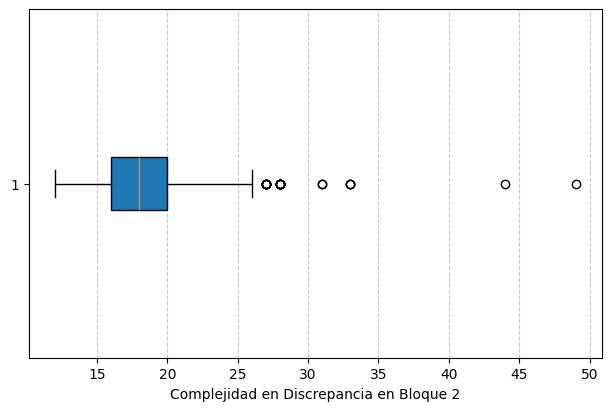

[26, np.float64(20.0), np.float64(18.0), np.float64(16.0), 12]

In [27]:
plot_horizontal_boxplot(sort_res, "Complejidad en " + complexity + " para " + dataset_name + " Sorted")
get_boxplot_lines(sort_res)

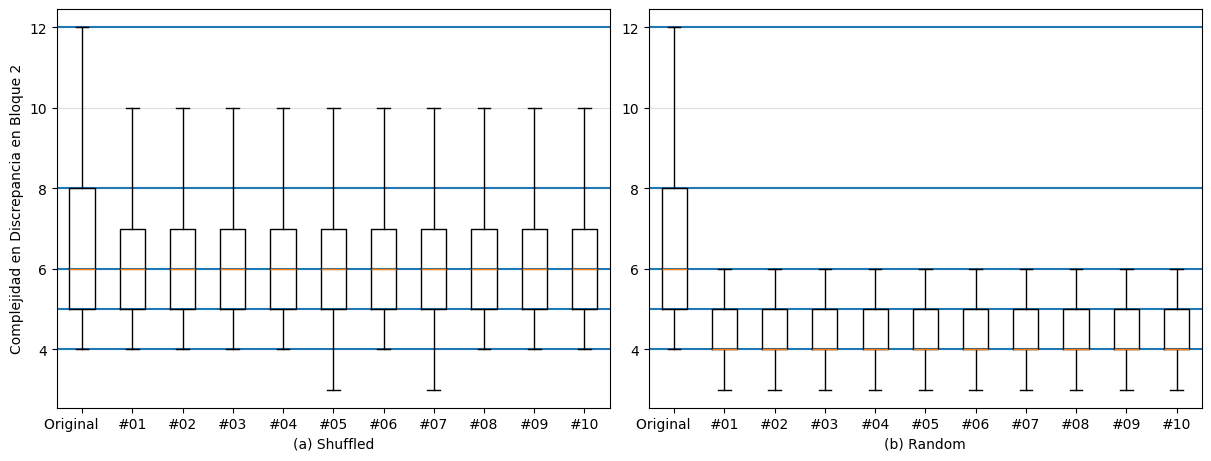

[12, np.float64(8.0), np.float64(6.0), np.float64(5.0), 4]

In [28]:
plot_boxplot_shuffled_and_random()
get_boxplot_lines(orig_res)

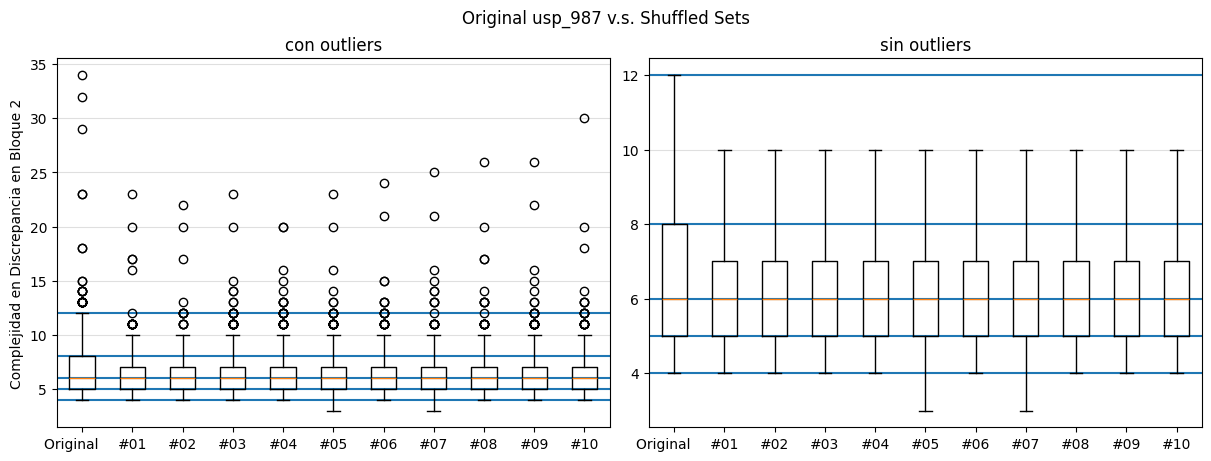

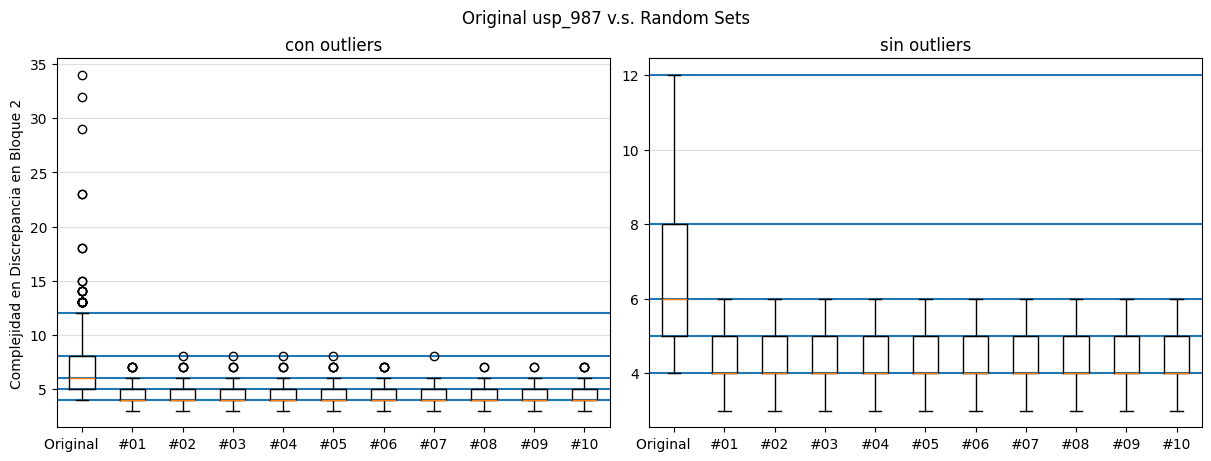

In [29]:
plot_boxplot_with_and_without_outliers(shuf_res, "Shuffled")
plot_boxplot_with_and_without_outliers(rand_res, "Random")

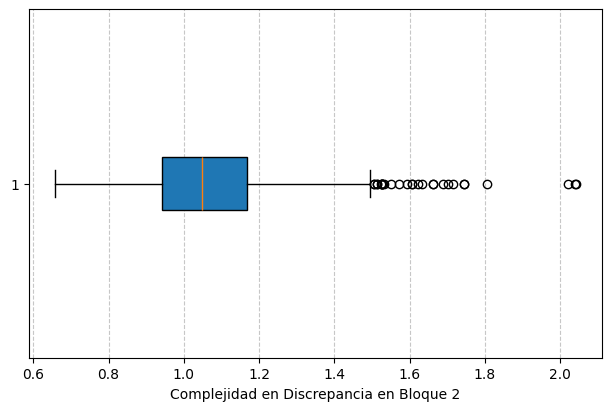

In [30]:
import numpy as np
Xs = np.matrix(shuf_res).A
mean_s = Xs.mean(axis=0)
def plot_original_over_shufled_boxplot() ->  None:
    plt.figure(figsize=(6, 4), layout='constrained')
    quotient = np.divide(np.array(orig_res), mean_s)
    plt.boxplot(quotient, vert=False, patch_artist=True)

    #plt.title(title)
    plt.xlabel("Compl. " + complexity + " / Prom. " + complexity + " Shuffled")
    plt.xlabel("Complejidad en " + complexity)
    plt.grid(True, axis='x', linestyle='--', alpha=0.7)
    plt.show()

    plt.show()

plot_original_over_shufled_boxplot()